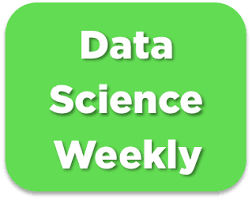

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

#   Introduction

This notebook presents a comprehensive approach to a machine learning challenge aimed at predicting user subscription conversions for the www.datascienceweekly.org newsletter. The challenge involves utilizing a dataset provided by the website, which comprises user interaction data, to build and refine predictive models. The dataset is divided into two parts: a training set (conversion_data_train.csv) that includes both features and the target variable (indicating whether a user subscribed), and a testing set (conversion_data_test.csv) that contains only the features. The primary objective is to develop a model that can accurately predict subscription conversions based on user data.

#   Plan

1. Importing Libraries
2. Functions
3. Import Data
4. Exploratory Data Analysis
5. Preprocessing
6. Models
    - SVM
    - Random Forest
    - Decision Tree
    - Logistic Regression
    - KNN
    - Gradient Boosting
    - XGBoost
7. Performance assessment

# Import libraries

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier


#   Functions

In [325]:
def get_feature_names(column_transformer):
    # Initialize an empty list to collect feature names
    new_feature_names = []
    
    # Loop through each transformer in the ColumnTransformer
    for transformer_in_columns in column_transformer.transformers_:
        
        # Unpack the transformer name, the transformer object, and the original feature names
        transformer_name, transformer, orig_feature_names = transformer_in_columns
        
        # Process each transformer that is not named 'remainder'
        # (The 'remainder' transformer usually just passes through remaining columns)
        if transformer_name != 'remainder':
            
            # Check if the transformer has the method 'get_feature_names_out'
            if hasattr(transformer, 'get_feature_names_out'):
                # For transformers with a get_feature_names_out method
                names = transformer.get_feature_names_out(orig_feature_names)
                new_feature_names.extend(names)
            else:
                # For transformers without a get_feature_names_out method
                new_feature_names.extend(orig_feature_names)
    
    return new_feature_names


# Import data

In [326]:
#   Load the data
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [327]:
"""Depiction of dataset variables and statistics"""
#Dataset information
print('Dataset information')
print(data.info())
#Top 5 rows of dataset
display('Dataset:', data.head())
print('General statistics of the dataset:')
display(data.describe(include='all'))
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])
print()
print('Missing values for each variable')
display(data.isnull().sum())
print('percentage of missing value')
display(data.isna().sum() / data.count() * 100)

Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB
None


'Dataset:'

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


General statistics of the dataset:


,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Number of rows: 284580
Number of columns: 6

Missing values for each variable


country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

percentage of missing value


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

In [328]:
# The dataset is composed of 284 580 rows and 6 columns. There are no missing values in the dataset.
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

#   Exploratory Data Analysis

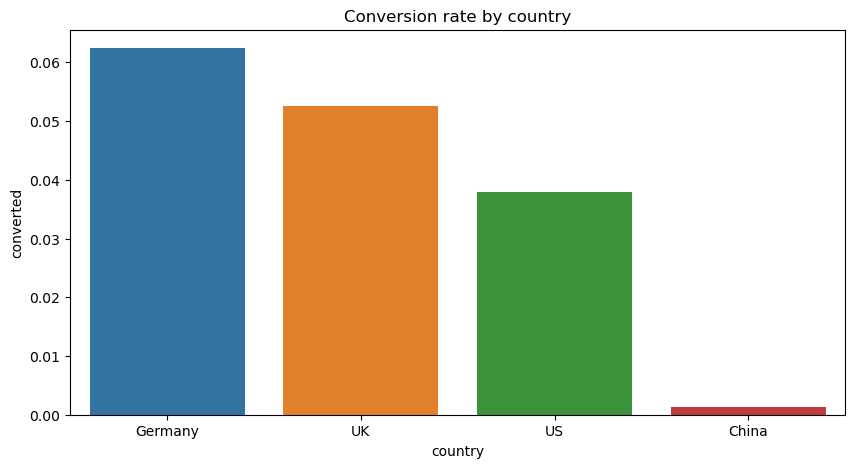

In [329]:
#   Data visualization
#   Conversion rate by country
conversion_rate_country = data.groupby('country')['converted'].mean().reset_index()
conversion_rate_country = conversion_rate_country.sort_values(by='converted', ascending=False)

# Plot the conversion rate by country with plt
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='converted', data=conversion_rate_country)
plt.title('Conversion rate by country')
plt.show()


In [330]:
# The conversion rate is quite different from one country to another. It is the highest in Germany and UK, and the lowest in China.

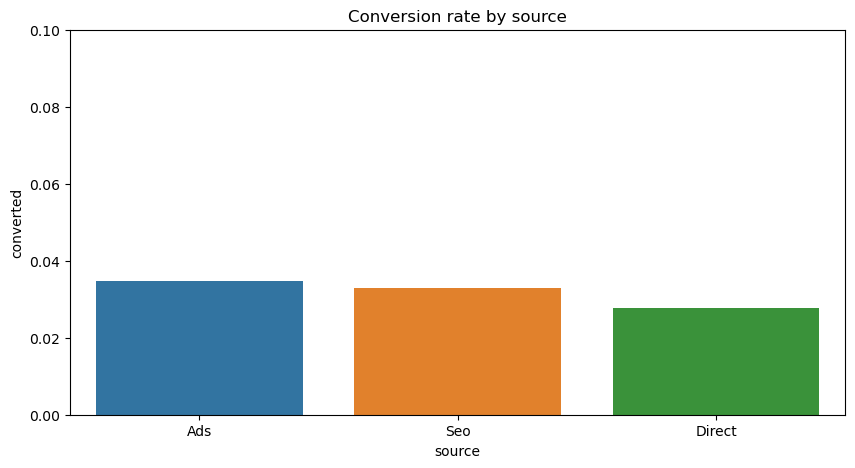

In [331]:
#  Conversion rate by source
conversion_rate_source = data.groupby('source')['converted'].mean().reset_index()
conversion_rate_source = conversion_rate_source.sort_values(by='converted', ascending=False)

# Plot the conversion rate by source with plt
plt.figure(figsize=(10, 5))
sns.barplot(x='source', y='converted', data=conversion_rate_source)
plt.title('Conversion rate by source')
plt.ylim(0, 0.1)
plt.show()


In [332]:
# The conversion rate is quite similar from one source to another.

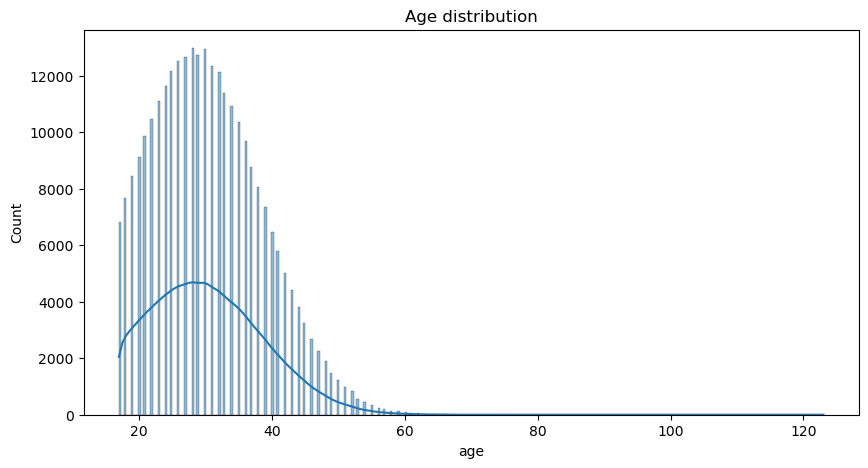

In [333]:
#  Plot age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['age'], kde=True)
plt.title('Age distribution')
plt.show()

In [334]:
# Filter age outliers where age count is less than 10
age_outliers = data.groupby('age').size().reset_index(name='counts')
age_outliers = age_outliers[age_outliers['counts'] < 10]
age_outliers = age_outliers['age'].tolist()

# Remove age outliers
data = data[~data['age'].isin(age_outliers)]

data.age.describe()


count    284555.000000
mean         30.560531
std           8.256866
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          65.000000
Name: age, dtype: float64

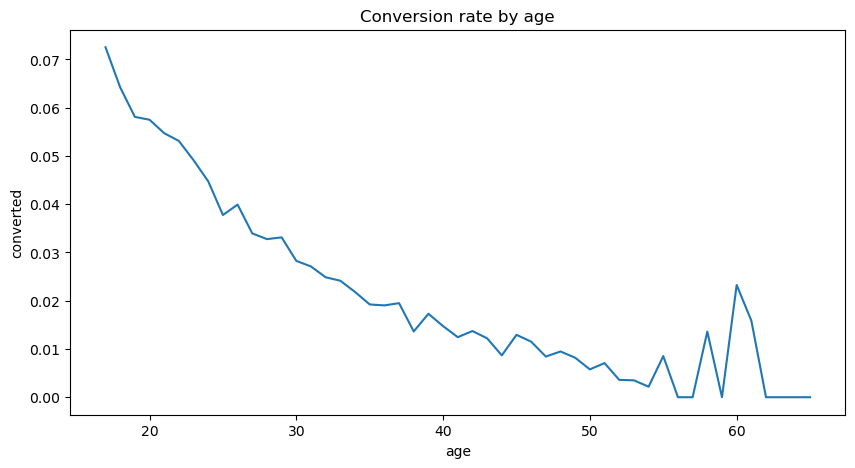

In [335]:
#   Plot conversion rate by age
conversion_rate_age = data.groupby('age')['converted'].mean().reset_index()

# Plot the conversion rate by age with plt
plt.figure(figsize=(10, 5))
sns.lineplot(x='age', y='converted', data=conversion_rate_age)
plt.title('Conversion rate by age')
plt.show()



In [336]:
# The age of the user is an important variable to predict the conversion rate. The conversion rate is higher for younger users.

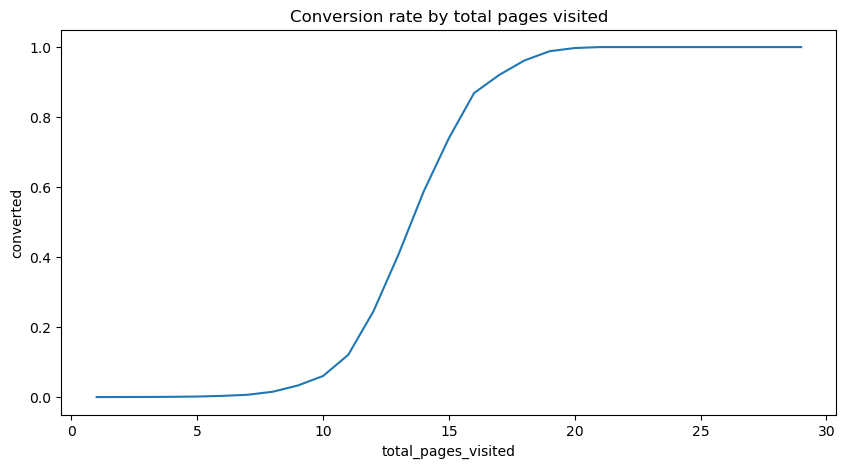

In [337]:
# Conversion rate by total pages visited
conversion_rate_pages = data.groupby('total_pages_visited')['converted'].mean().reset_index()

# Plot the conversion rate by total pages visited with plt
plt.figure(figsize=(10, 5))
sns.lineplot(x='total_pages_visited', y='converted', data=conversion_rate_pages)
plt.title('Conversion rate by total pages visited')
plt.show()


In [338]:
#Number of total user
print('Number of total user:', data.shape[0])
# Number of user that have visited more than 20 pages
print('Number of user that have visited more than 10 pages:', data[data['total_pages_visited'] > 10].shape[0])

# While the conversion rate is very high with a high number of pages visited, the number of users that have visited more than 10 pages is very low.

Number of total user: 284555
Number of user that have visited more than 10 pages: 16997


In [339]:
# A relation exist between the number of pages visited and the conversion rate. The more pages are visited, the more the conversion rate increases.

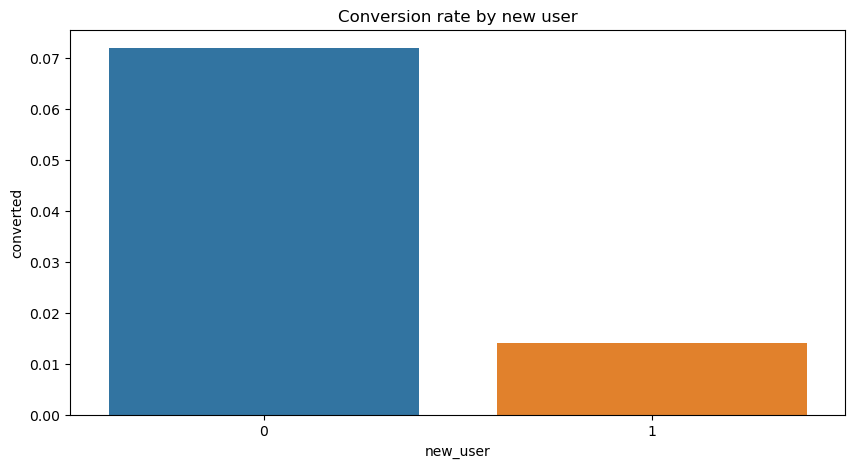

In [340]:
# Conversion rate by new user
conversion_rate_new_user = data.groupby('new_user')['converted'].mean().reset_index()

# Plot the conversion rate by new user with plt
plt.figure(figsize=(10, 5))
sns.barplot(x='new_user', y='converted', data=conversion_rate_new_user)
plt.title('Conversion rate by new user')
plt.show()

In [341]:
# Conversion rate in the case of a new user is low in opposition to the case of an old user.

#   Preprocessing

In [342]:
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = 'converted'

X = data_sample.loc[:, features_list]
Y = data_sample.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [343]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


In [344]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [345]:
print("Encoding categorical features and standardizing numerical features...")
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Encoding categorical features and standardizing numerical features...


In [346]:
# Put here all the preprocessings
X_train_proc = preprocessor.fit_transform(X_train)

print("...Done")
print(X_train_proc[0:5,:])

...Done
[[-0.68286159  0.66773515 -0.86434363  0.          0.          0.
   0.          1.        ]
 [ 0.03740906  0.66773515 -1.16334687  0.          0.          1.
   0.          0.        ]
 [-1.28308714  0.66773515  1.22867908  0.          0.          1.
   1.          0.        ]
 [ 1.47795036 -1.49759976 -0.26633714  0.          1.          0.
   1.          0.        ]
 [-0.68286159 -1.49759976  0.92967584  0.          0.          1.
   0.          0.        ]]


In [347]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test_proc = preprocessor.transform(X_test)
print("...Done")
print(X_test_proc[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.8029067   0.66773515  0.63067259  0.          0.          0.
   0.          1.        ]
 [ 0.75767971 -1.49759976 -0.86434363  0.          0.          1.
   0.          0.        ]
 [ 2.31826612  0.66773515  0.92967584  0.          0.          1.
   0.          0.        ]
 [ 1.35790525  0.66773515 -0.56534039  0.          0.          0.
   0.          1.        ]
 [ 1.95813079 -1.49759976 -0.86434363  0.          0.          0.
   0.          0.        ]]


#   Models

In [348]:
# Intialize table to store results
results = pd.DataFrame(columns = ['Model', 'Accuracy train', 'Accuracy test', 'F1 Score train', 'F1 Score test'])

In [349]:
# Apply the function to preprocessor
feature_names_after_preprocessing = get_feature_names(preprocessor)

In [350]:
# Calculate the class weight
class_weight = Y_train.value_counts(normalize=True).to_dict()
print('Class weight:', class_weight)

Class weight: {0: 0.966375, 1: 0.033625}


## SVM

In [351]:
# SVM takes wy too long to train

In [352]:
'''

# Create a pipeline with a SVM classifier
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', SVC(probability=True))])

# Perform a grid search to find the best parameters
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'poly']
}

grid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, n_jobs=-1, scoring='f1')
grid_search_svm.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_svm.best_params_)
print("Best score : ", grid_search_svm.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_svm = grid_search_svm.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_svm))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_svm))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_svm = grid_search_svm.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_svm))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_svm))
print()

#   Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_svm))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_svm))
disp.plot()
plt.show()

# Add results to the table
results = results.append({'Model': 'SVM', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_svm), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_svm), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_svm), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_svm)}, ignore_index=True)

'''

'\n\n# Create a pipeline with a SVM classifier\npipe_svm = Pipeline(steps=[(\'preprocessor\', preprocessor),\n                            (\'classifier\', SVC(probability=True))])\n\n# Perform a grid search to find the best parameters\nparam_grid_svm = {\n    \'classifier__C\': [0.1, 1, 10],\n    \'classifier__gamma\': [0.1, 1, 10],\n    \'classifier__kernel\': [\'rbf\', \'poly\']\n}\n\ngrid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, n_jobs=-1, scoring=\'f1\')\ngrid_search_svm.fit(X_train, Y_train)\n\n# Print the best parameters\nprint("Best parameters : ", grid_search_svm.best_params_)\nprint("Best score : ", grid_search_svm.best_score_)\nprint()\n\n# Print accuracy and F1 score on the training set\nY_train_pred_svm = grid_search_svm.predict(X_train)\nprint("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_svm))\nprint("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_svm))\nprint()\n\n# Print accuracy and F1 score on the test set\n

##   Random Forest

Best parameters :  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 50}
Best score :  0.769652042769931

Accuracy on the training set :  0.987625
F1 score on the training set :  0.7933194154488518

Accuracy on the test set :  0.9855
F1 score on the test set :  0.7603305785123967

Confusion matrix on the training set :


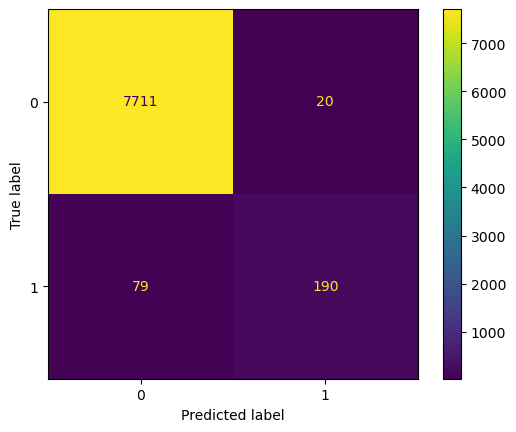

Confusion matrix on the test set :


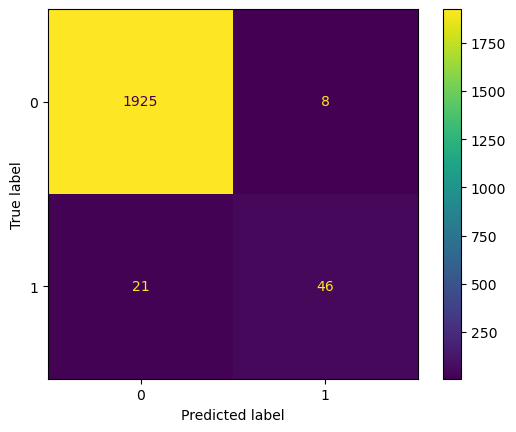

In [353]:
# Create a pipeline with a Random Forest classifier
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=0))])

# Perform a grid search to find the best parameters
param_grid_rf = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10]
}

grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, scoring='f1')
grid_search_rf.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_rf.best_params_)
print("Best score : ", grid_search_rf.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_rf = grid_search_rf.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_rf))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_rf))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_rf = grid_search_rf.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_rf))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_rf))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_rf))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_rf))
disp.plot()
plt.show()

# Add results to the table
results = results._append({'Model': 'Random Forest', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_rf), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_rf), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_rf), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_rf)}, ignore_index=True)


                     Importance
total_pages_visited    0.849919
age                    0.069494
new_user               0.043611
country_UK             0.012878
country_US             0.008607
source_Seo             0.007586
source_Direct          0.004543
country_Germany        0.003362


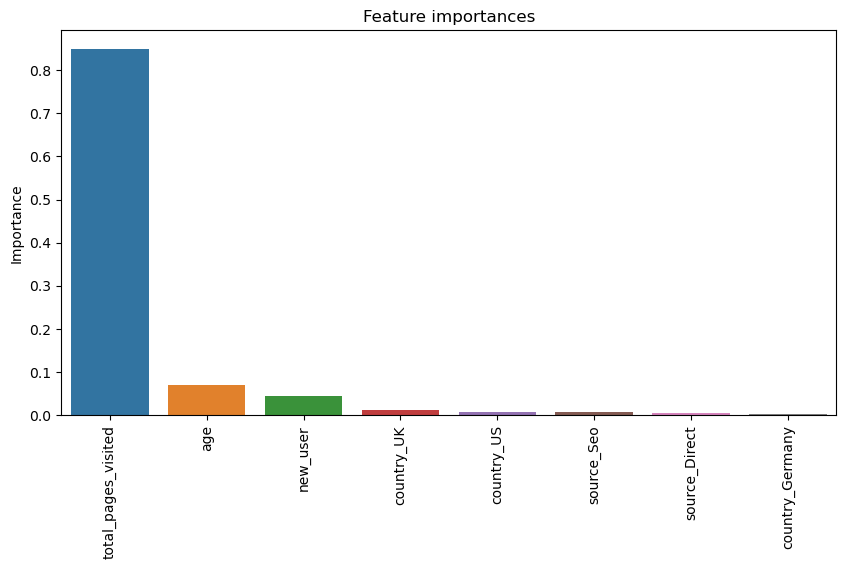

In [354]:
# Feature importance with Random Forest
importances = grid_search_rf.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_rf.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()


##  Random Forest with Weights

Best parameters :  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 10}
Best score :  0.7390621819037861

Accuracy on the training set :  0.992375
F1 score on the training set :  0.8747433264887063

Accuracy on the test set :  0.986
F1 score on the test set :  0.7666666666666666

Confusion matrix on the training set :


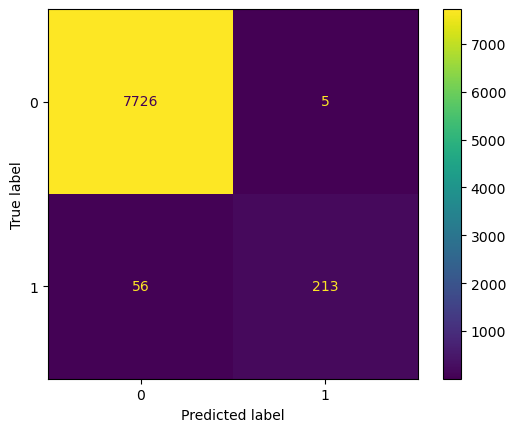

Confusion matrix on the test set :


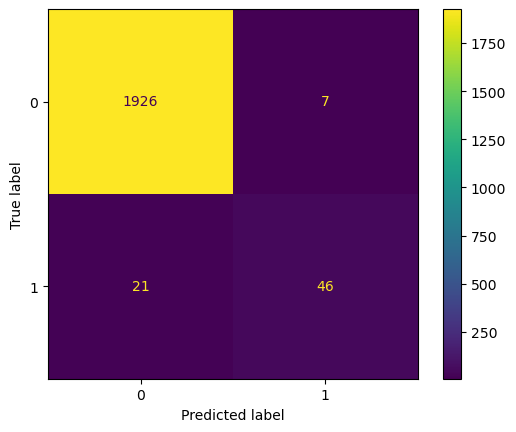

                     Importance
total_pages_visited    0.668649
age                    0.207211
new_user               0.053152
source_Seo             0.022615
source_Direct          0.018792
country_US             0.017285
country_UK             0.007872
country_Germany        0.004423


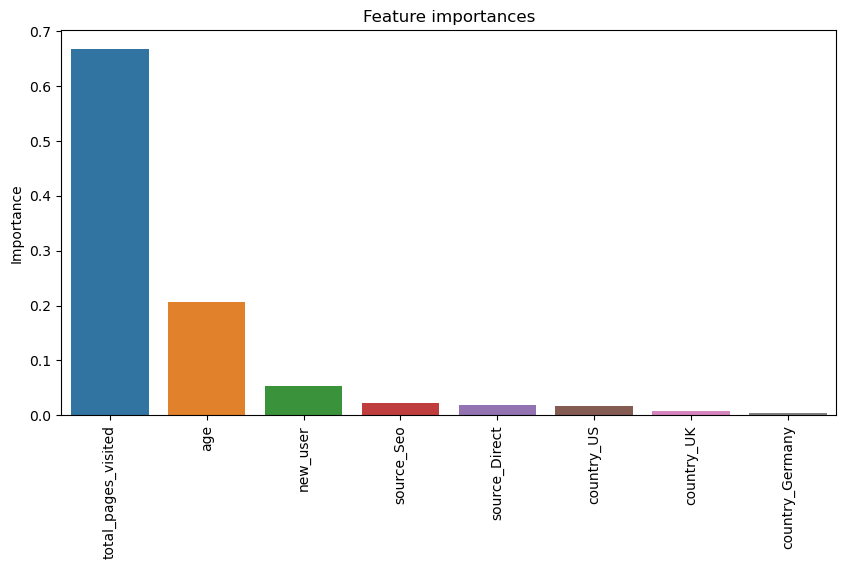

In [355]:
# Create a pipeline with a Random Forest classifier
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=0, class_weight=class_weight))])

# Perform a grid search to find the best parameters
param_grid_rf = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [None, 2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10]
}

grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, scoring='f1')
grid_search_rf.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_rf.best_params_)
print("Best score : ", grid_search_rf.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_rf = grid_search_rf.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_rf))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_rf))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_rf = grid_search_rf.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_rf))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_rf))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_rf))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_rf))
disp.plot()
plt.show()

# Feature importance with Random Forest
importances = grid_search_rf.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_rf.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()

# Add results to the table
results = results._append({'Model': 'Random Forest with class weight', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_rf), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_rf), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_rf), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_rf)}, ignore_index=True)


##   Decision Tree

Best parameters :  {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10}
Best score :  0.7360471829090344

Accuracy on the training set :  0.985625
F1 score on the training set :  0.7648261758691206

Accuracy on the test set :  0.985
F1 score on the test set :  0.7540983606557378

Confusion matrix on the training set :


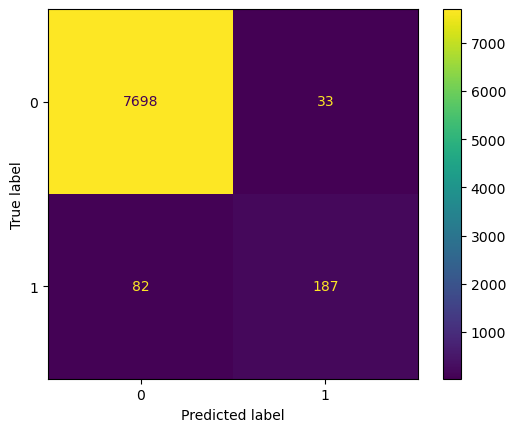

Confusion matrix on the test set :


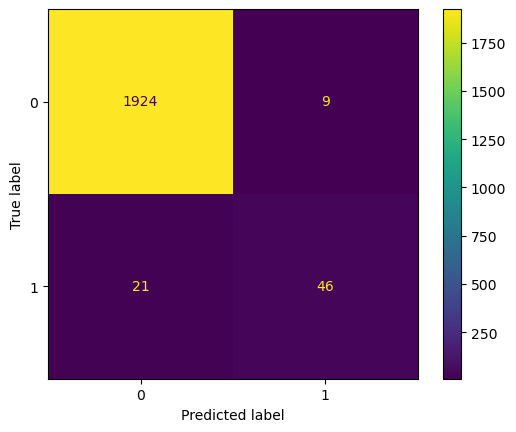

In [356]:
# Create a pipeline with a Decision Tree classifier
pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=0))])

# Perform a grid search to find the best parameters
param_grid_dt = {
    'classifier__max_depth': [None, 2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10]
}

grid_search_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, n_jobs=-1, scoring='f1')
grid_search_dt.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_dt.best_params_)
print("Best score : ", grid_search_dt.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_dt = grid_search_dt.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_dt))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_dt))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_dt = grid_search_dt.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_dt))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_dt))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_dt))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_dt))
disp.plot()
plt.show()

# Add results to the table
results = results._append({'Model': 'Decision Tree', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_dt), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_dt), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_dt), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_dt)}, ignore_index=True)


                     Importance
total_pages_visited    0.882145
new_user               0.063963
age                    0.038747
source_Direct          0.006096
source_Seo             0.005492
country_UK             0.003557
country_Germany        0.000000
country_US             0.000000


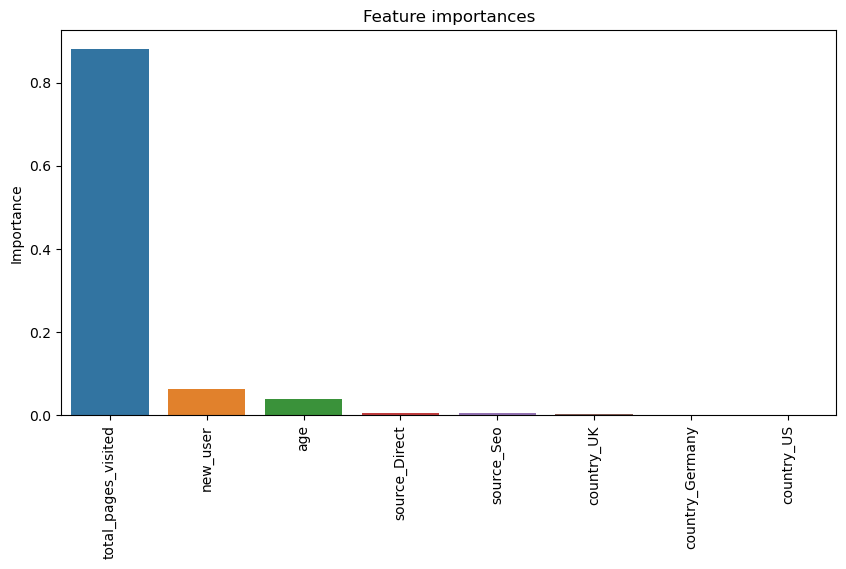

In [357]:
#   Feature importance with Decision Tree
importances = grid_search_dt.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_dt.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()


##  Decision Tree with Weights

Best parameters :  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2}
Best score :  0.657356864345596

Accuracy on the training set :  0.989625
F1 score on the training set :  0.8175824175824176

Accuracy on the test set :  0.981
F1 score on the test set :  0.6885245901639345

Confusion matrix on the training set :


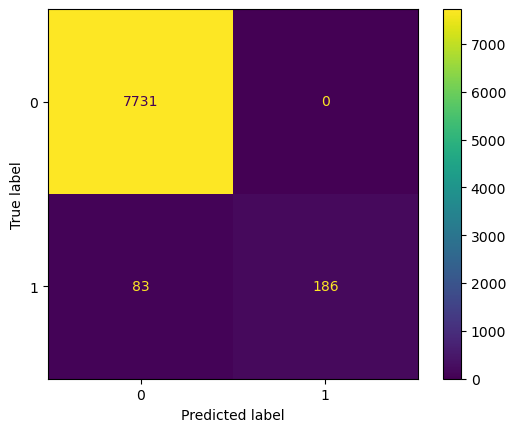

Confusion matrix on the test set :


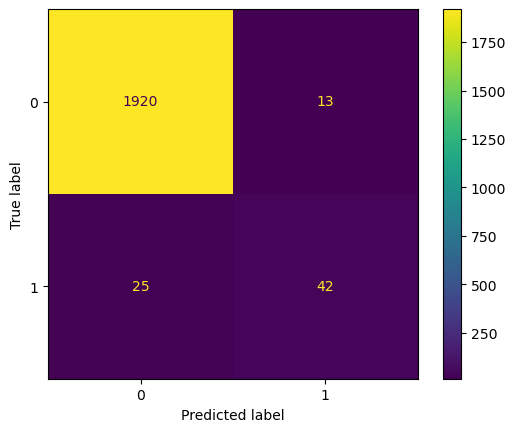

                     Importance
age                    0.415293
total_pages_visited    0.414925
new_user               0.046735
source_Direct          0.042000
country_US             0.034602
country_UK             0.033671
source_Seo             0.011624
country_Germany        0.001149


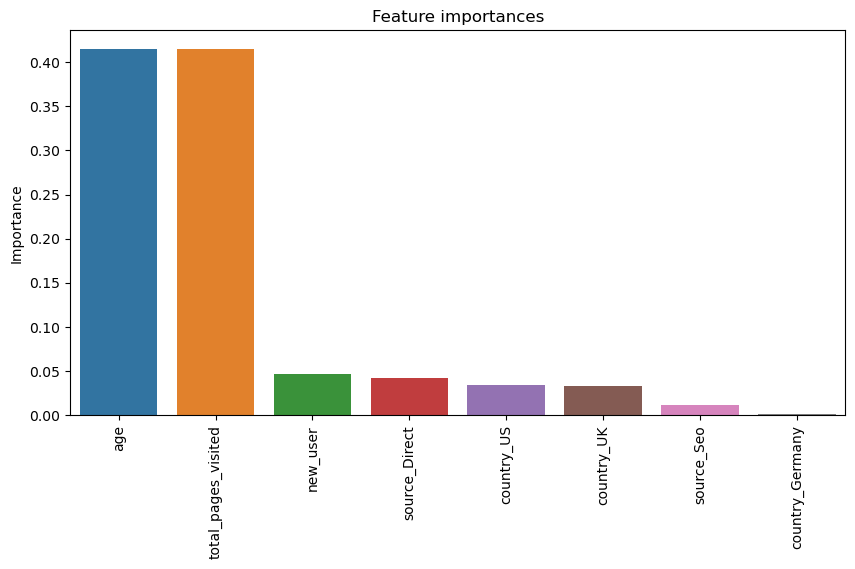

In [358]:
# Create a pipeline with a Decision Tree classifier
pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier(random_state=0, class_weight=class_weight))])

# Perform a grid search to find the best parameters
param_grid_dt = {
    'classifier__max_depth': [None, 2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10]
}

grid_search_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, n_jobs=-1, scoring='f1')
grid_search_dt.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_dt.best_params_)
print("Best score : ", grid_search_dt.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_dt = grid_search_dt.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_dt))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_dt))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_dt = grid_search_dt.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_dt))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_dt))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_dt))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_dt))
disp.plot()
plt.show()

#   Feature importance with Decision Tree
importances = grid_search_dt.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_dt.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()

# Add results to the table 
results = results._append({'Model': 'Decision Tree with class weight', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_dt), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_dt), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_dt), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_dt)}, ignore_index=True)


##   Logistic Regression

Best parameters :  {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score :  0.7832860578972586

Accuracy on the training set :  0.98675
F1 score on the training set :  0.7836734693877551

Accuracy on the test set :  0.987
F1 score on the test set :  0.7936507936507936

Confusion matrix on the training set :


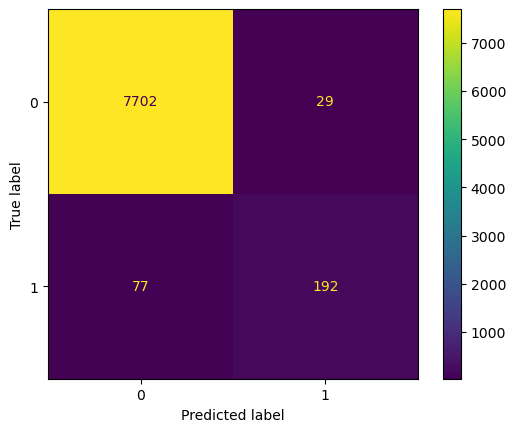

Confusion matrix on the test set :


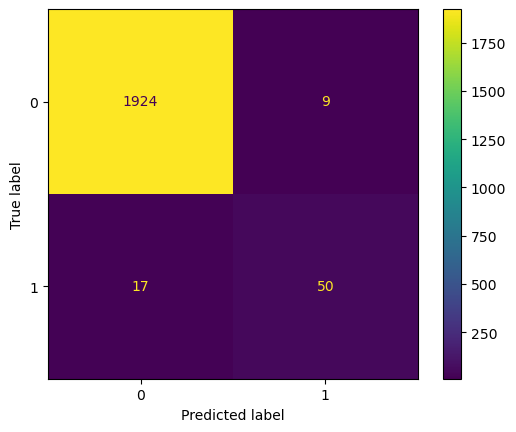

In [359]:
# Create a pipeline with a Logistic Regression classifier
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(random_state=0))])

# Perform a grid search to find the best parameters
param_grid_lr = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1, scoring='f1')
grid_search_lr.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_lr.best_params_)
print("Best score : ", grid_search_lr.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_lr = grid_search_lr.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_lr))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_lr))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_lr = grid_search_lr.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_lr))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_lr))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_lr))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_lr))
disp.plot()
plt.show()

# Add results to the table
results = results._append({'Model': 'Logistic Regression', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_lr), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_lr), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_lr), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_lr)}, ignore_index=True)


                     Importance
country_Germany        3.913634
country_UK             3.326518
country_US             2.745962
total_pages_visited    2.553824
source_Seo             0.288199
source_Direct         -0.116393
new_user              -0.771000
age                   -0.789928


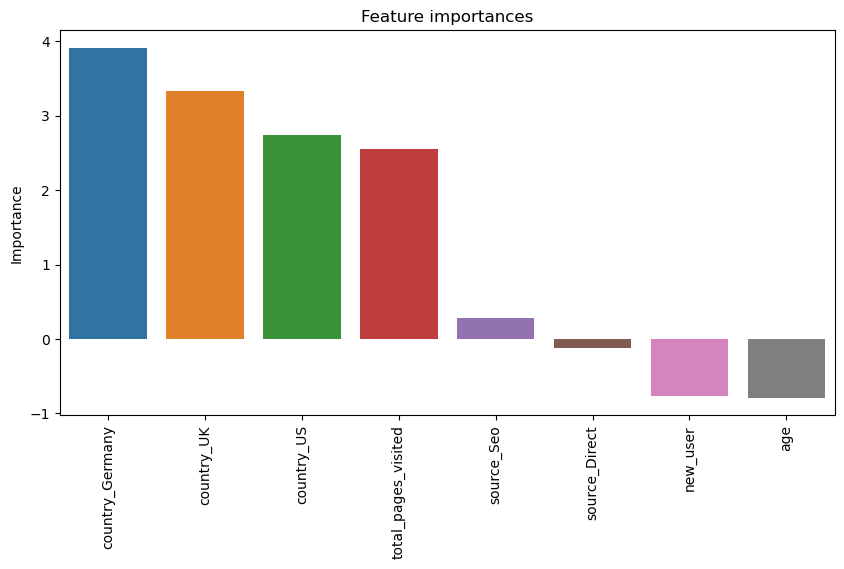

In [360]:
# Feature importance with Logistic Regression
importances = grid_search_lr.best_estimator_.named_steps['classifier'].coef_[0]
feature_names = get_feature_names(grid_search_lr.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()


##  Logistic Regression with Weights

Best parameters :  {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best score :  0.5223734256610968

Accuracy on the training set :  0.97825
F1 score on the training set :  0.521978021978022

Accuracy on the test set :  0.979
F1 score on the test set :  0.553191489361702

Confusion matrix on the training set :


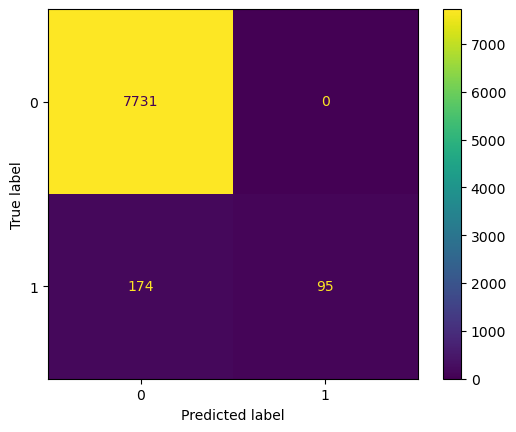

Confusion matrix on the test set :


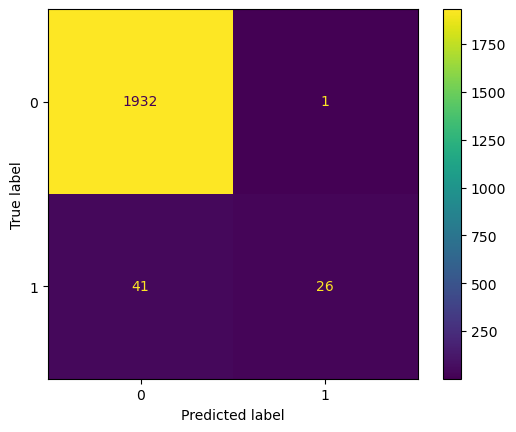

                     Importance
country_Germany        4.721217
country_UK             4.436829
country_US             3.687753
total_pages_visited    2.830762
source_Seo             0.334211
source_Direct          0.244625
new_user              -0.760628
age                   -0.976850


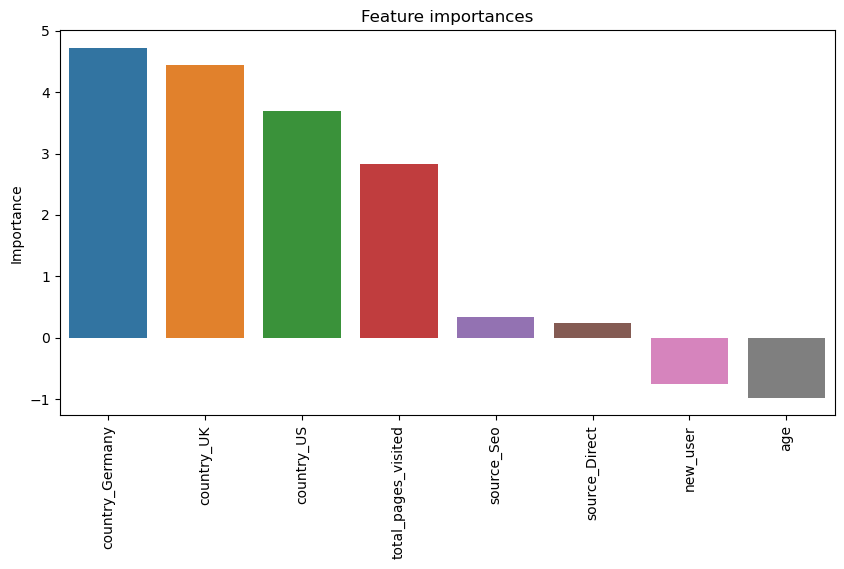

In [361]:
# Create a pipeline with a Logistic Regression classifier
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', LogisticRegression(random_state=0, class_weight=class_weight))])

# Perform a grid search to find the best parameters
param_grid_lr = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1, scoring='f1')
grid_search_lr.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_lr.best_params_)
print("Best score : ", grid_search_lr.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_lr = grid_search_lr.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_lr))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_lr))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_lr = grid_search_lr.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_lr))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_lr))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_lr))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_lr))
disp.plot()
plt.show()

# Feature importance with Logistic Regression
importances = grid_search_lr.best_estimator_.named_steps['classifier'].coef_[0]
feature_names = get_feature_names(grid_search_lr.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()

# Add results to the table
results = results._append({'Model': 'Logistic Regression with class weight', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_lr), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_lr), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_lr), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_lr)}, ignore_index=True)


##   Kneighbors

Best parameters :  {'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
Best score :  0.7387164934616088

Accuracy on the training set :  0.99625
F1 score on the training set :  0.9411764705882353

Accuracy on the test set :  0.9855
F1 score on the test set :  0.7642276422764228

Confusion matrix on the training set :


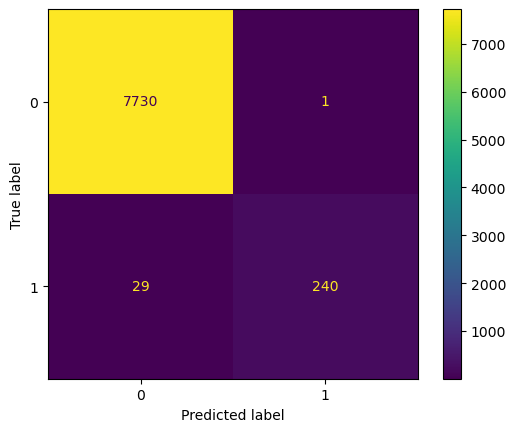

Confusion matrix on the test set :


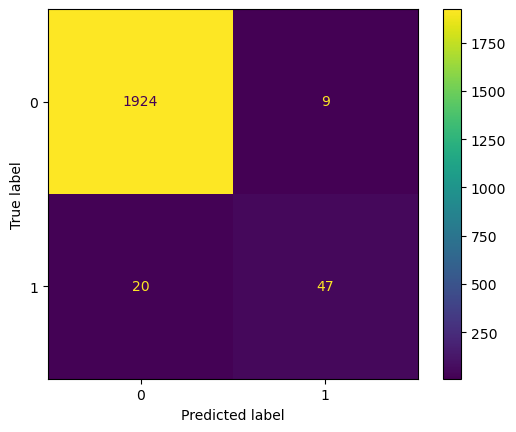

In [362]:
# Create a pipeline with a KNN classifier
pipe_knn = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', KNeighborsClassifier())])

# Perform a grid search to find the best parameters
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 10, 20],
    'classifier__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1, scoring='f1')
grid_search_knn.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_knn.best_params_)
print("Best score : ", grid_search_knn.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_knn = grid_search_knn.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_knn))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_knn))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_knn = grid_search_knn.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_knn))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_knn))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_knn))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_knn))
disp.plot()
plt.show()

# Add results to the table
results = results._append({'Model': 'KNN', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_knn), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_knn), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_knn), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_knn)}, ignore_index=True)


In [363]:
#   Feature importance with KNN
# KNN does not have a feature importance attribute, as it is a distance-based algorithm

##   GradientBoosting

Best parameters :  {'classifier__max_depth': 2, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Best score :  0.7519184922498207

Accuracy on the training set :  0.98625
F1 score on the training set :  0.7745901639344263

Accuracy on the test set :  0.9865
F1 score on the test set :  0.7804878048780487

Confusion matrix on the training set :


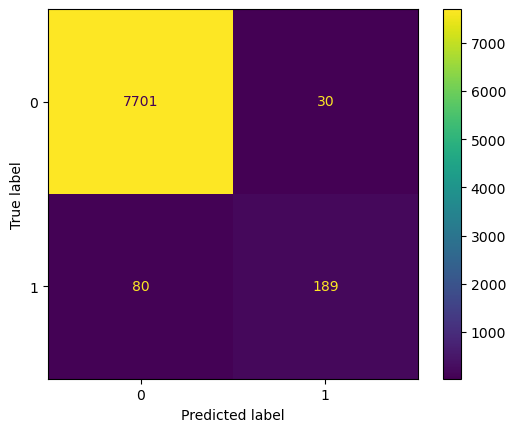

Confusion matrix on the test set :


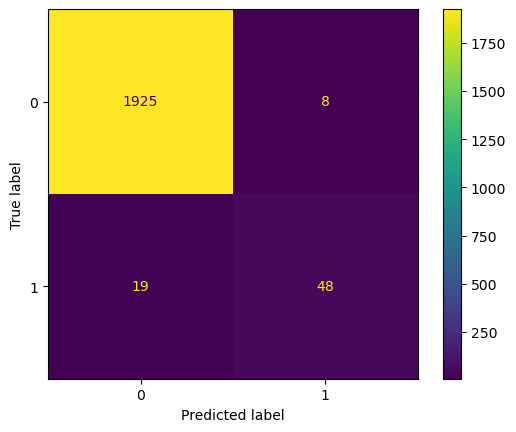

In [364]:
# Create a pipeline with a Gradient Boosting classifier
pipe_gb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', GradientBoostingClassifier(random_state=0))])

# Perform a grid search to find the best parameters
param_grid_gb = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, n_jobs=-1, scoring='f1')
grid_search_gb.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_gb.best_params_)
print("Best score : ", grid_search_gb.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_gb = grid_search_gb.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_gb))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_gb))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_gb = grid_search_gb.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_gb))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_gb))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_gb))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_gb))
disp.plot()

# Add results to the table
results = results._append({'Model': 'Gradient Boosting', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_gb), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_gb), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_gb), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_gb)}, ignore_index=True)



                     Importance
total_pages_visited    0.845444
new_user               0.100972
age                    0.032877
country_UK             0.013803
country_US             0.003917
country_Germany        0.002566
source_Seo             0.000422
source_Direct          0.000000


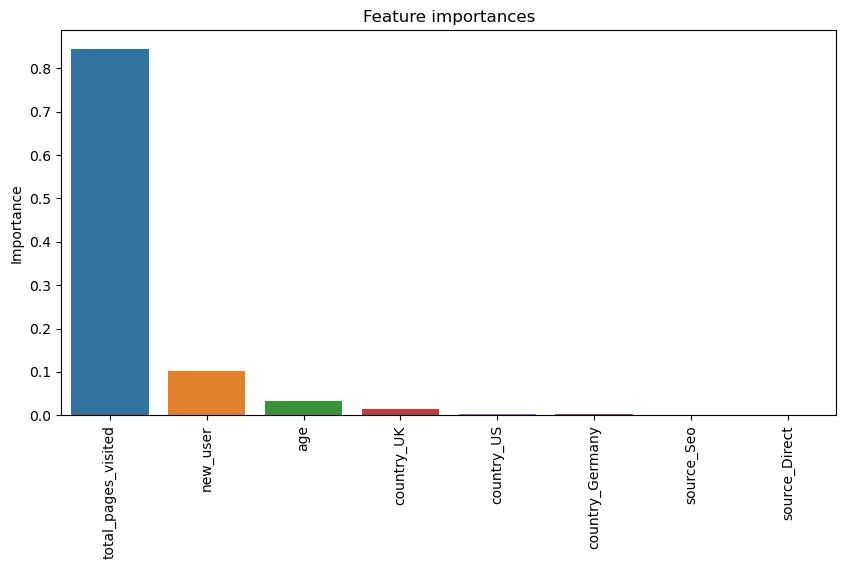

In [365]:
#  Feature importance with Gradient Boosting
importances = grid_search_gb.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_gb.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()


##  XGBoost

Best parameters :  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 200}
Best score :  0.7599761646384001

Accuracy on the training set :  0.9875
F1 score on the training set :  0.793388429752066

Accuracy on the test set :  0.986
F1 score on the test set :  0.7666666666666666

Confusion matrix on the training set :


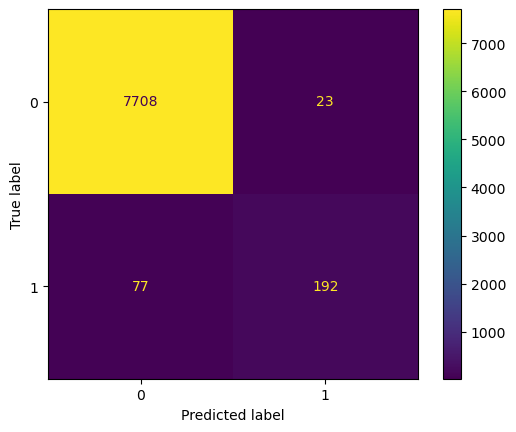

Confusion matrix on the test set :


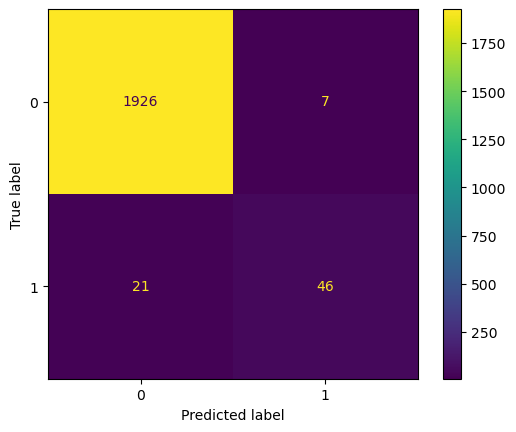

In [366]:
# Create a pipeline with a XGBoost classifier
pipe_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', XGBClassifier(random_state=0))])

# Perform a grid search to find the best parameters
param_grid_xgb = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [2, 5, 10],
    'classifier__learning_rate': [0.1, 0.01]
}

grid_search_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='f1')
grid_search_xgb.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters : ", grid_search_xgb.best_params_)
print("Best score : ", grid_search_xgb.best_score_)
print()

# Print accuracy and F1 score on the training set
Y_train_pred_xgb = grid_search_xgb.predict(X_train)
print("Accuracy on the training set : ", accuracy_score(Y_train, Y_train_pred_xgb))
print("F1 score on the training set : ", f1_score(Y_train, Y_train_pred_xgb))
print()

# Print accuracy and F1 score on the test set
Y_test_pred_xgb = grid_search_xgb.predict(X_test)
print("Accuracy on the test set : ", accuracy_score(Y_test, Y_test_pred_xgb))
print("F1 score on the test set : ", f1_score(Y_test, Y_test_pred_xgb))
print()

# Print confusion matrix on the training set
print("Confusion matrix on the training set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_train, Y_train_pred_xgb))
disp.plot()
plt.show()

# Print confusion matrix on the test set
print("Confusion matrix on the test set :")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, Y_test_pred_xgb))
disp.plot()
plt.show()

# Add results to the table
results = results._append({'Model': 'XGBoost', 
                            'Accuracy train': accuracy_score(Y_train, Y_train_pred_xgb), 
                            'Accuracy test': accuracy_score(Y_test, Y_test_pred_xgb), 
                            'F1 Score train': f1_score(Y_train, Y_train_pred_xgb), 
                            'F1 Score test': f1_score(Y_test, Y_test_pred_xgb)}, ignore_index=True)


                     Importance
total_pages_visited    0.627188
new_user               0.169854
age                    0.051890
country_UK             0.045376
country_US             0.044271
country_Germany        0.027704
source_Seo             0.022917
source_Direct          0.010799


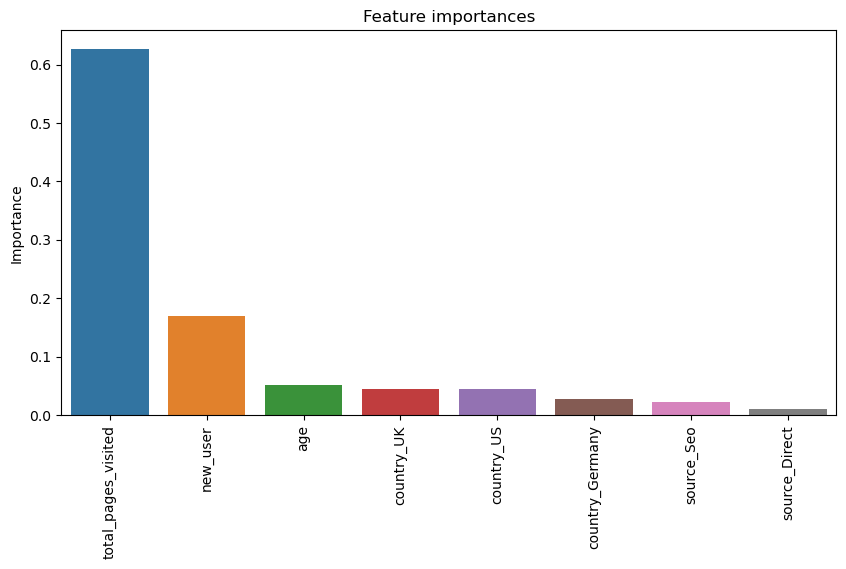

In [367]:
#   Feature importance with XGBoost
importances = grid_search_xgb.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = get_feature_names(grid_search_xgb.best_estimator_.named_steps['preprocessor'])

# Create a DataFrame that links feature importance with feature names
feature_importances = pd.DataFrame(importances, index=feature_names, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.title('Feature importances')
plt.xticks(rotation=90)
plt.show()

# Performance assessment

In [369]:
# Display the results
print("Results :")
display(results)

Results :


,Model,Accuracy train,Accuracy test,F1 Score train,F1 Score test
0,Random Forest,0.987625,0.9855,0.793319,0.760331
1,Random Forest with class weight,0.992375,0.9860,0.874743,0.766667
2,Decision Tree,0.985625,0.9850,0.764826,0.754098
3,Decision Tree with class weight,0.989625,0.9810,0.817582,0.688525
4,Logistic Regression,0.986750,0.9870,0.783673,0.793651
5,Logistic Regression with class weight,0.978250,0.9790,0.521978,0.553191
6,KNN,0.996250,0.9855,0.941176,0.764228
7,Gradient Boosting,0.986250,0.9865,0.774590,0.780488
8,XGBoost,0.987500,0.9860,0.793388,0.766667
9,XGBoost with class weight,0.987500,0.9860,0.793388,0.766667


In [371]:
# Overall the most important feature is the number of pages visited by far in every case. Then it is either age or new_user, the rest of the features are not very important.
# Except in the logistic regression case, where the most important features are the country and then the total pages visited, followed by new_user.
# This is an alternative to the other models.

# The accuracy is very high for all models, but the F1 score is lower. This is due to the fact that the dataset is imbalanced, with a very high number of non-converted users compared to converted users.

# The impact of the class weight is not very important, as the results are quite similar or worse with it. The class weight is useful when the dataset is very imbalanced, which is not the case here.

# The best model is the logistic regression, as it has the highest F1 score on the test set, with a very close F1 score on the training set. The accuracy is also very high.

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**